#   Συλλήψεις

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Για να κατανοήσουμε καλύτερα το PCA θα πάμε σε ένα άλλο σύνολο δεδομένων.

* Αφορά δεδομένα συλλήψεων στις πολιτείες των Ηνωμένων Πολιτειών το 1973.

* Οι αριθμοί είναι συλλήψεις στις 100.000 εκτός από τη στήλη `UrbanPop` η οποία περιέχει το ποσοστό του αστικού πληθυσμού.

In [1]:
import statsmodels.api as sm

us_arrests = sm.datasets.get_rdataset(dataname='USArrests', package='datasets')
print(us_arrests.data.shape)
us_arrests.data.head()

(50, 4)


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


* Όπως είπαμε, η μέθοδος PCA επηρεάζεται από διαφορές στη διακύμανση των δεδομένων, οπότε θα εξασφαλίσουμε ότι έχουν μέσο όρο 0 και διακύμανση 1.

In [2]:
from sklearn.preprocessing import StandardScaler

X = us_arrests.data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

* Θα αναζητήσουμε δύο συνιστώσες.

In [3]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(X)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


* Για να δούμε πόση από τη διακύμανση των δεδομένων εξηγούν οι δύο αυτές συνιστώσες ή διαστάσεις:

In [4]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.62006039 0.24744129]
0.8675016829223338


* Και να δούμε και τις ίδιες τις συνιστώσες:

In [5]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864]])

* Η πρώτη συνιστώσα λοιπόν είναι:

$$z_1 = 0{,}53589947 \times x_1 +  0{,}58318363 \times x_2 + 0{,}27819087 \times x_3 + 0{,}54343209 \times x_4 $$

* Και η δεύτερη:

$$z_2 = 0{,}41818087 \times x_1 +  0{,}1879856 \times x_2 - 0{,}87280619 \times x_3 - 0{,}16731864 \times x_4 $$

* Όπου: $x_1$ είναι `Murder`, $x_2$ είναι `Assault`, $x_3$ είναι `UrbanPop`, $x_4$ είναι`Rape`.

* Ένας τρόπος να καταλάβουμε τι έκανε η μέθοδος PCA είναι μέσω ενός *διπλοδιαγράμματος* (biplot).

* Το διάγραμμα απεικονίζει τα δεδομένα μας στις διαστάσεις που έχουμε βρει (τώρα που είναι δύο, μπορούμε).

* Επίσης εμφανίζει διανύσματα που δείχνουν πόσο συνεισφέρουν τα αρχικά χαρακτηριστικά στις συνιστώσες.

* Ο αριστερός και ο κάτω άξονας είναι οι κύριες συνιστώσες.

* Ο δεξιός και ο πάνω άξονας δείχνουν τη συνεισφορά του κάθε χαρακτηριστικού στις συνιστώσες, δηλαδή τα φορτία.

In [6]:
from math import ceil
import matplotlib.pyplot as plt

# based on https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def biplot(score, coeff, text, labels=None):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(111, label='pcas')
    ax2 = fig.add_subplot(111, label='loading vectors', frame_on=False)
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()    
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    # draw scatterplot
    ax1.scatter(xs, ys, fc='k')
    for i, txt in enumerate(text):
        ax1.text(xs[i] + 0.05, ys[i], txt,
                    fontsize=12,
                    alpha=0.75,
                    c='blue')
    
    # draw loading vectors
    for i in range(n):
        ax2.arrow(0, 0, coeff[i,0] * 0.85, coeff[i,1] * 0.85, 
                  lw=1,
                  color = 'r',alpha = 0.5, head_width=0.025, head_length=0.025)
        if labels is None:
            ax2.text(coeff[i,0], coeff[i,1], "Var"+str(i+1), 
                     color = 'g', ha = 'center', va = 'center')
        else:
            ax2.text(coeff[i,0], coeff[i,1], 
                     labels[i], color = 'brown', ha = 'center', va = 'center',
                     fontsize=14)
    
    xmax = max(xs.min(), xs.max(), key=abs)
    xlim = 0.5 * ceil(2.0 * xmax)
    ax1.set_xlim(-xlim, xlim)
    ymax = max(ys.min(), ys.max(), key=abs)
    ylim = 0.5 * ceil(2.0 * ymax)
    ax1.set_ylim(-ylim, ylim)
    ax1.axhline(0, linestyle=':', color='k', lw=0.5) # horizontal lines
    ax1.axvline(0, linestyle=':', color='k', lw=0.5) # vertical lines
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)

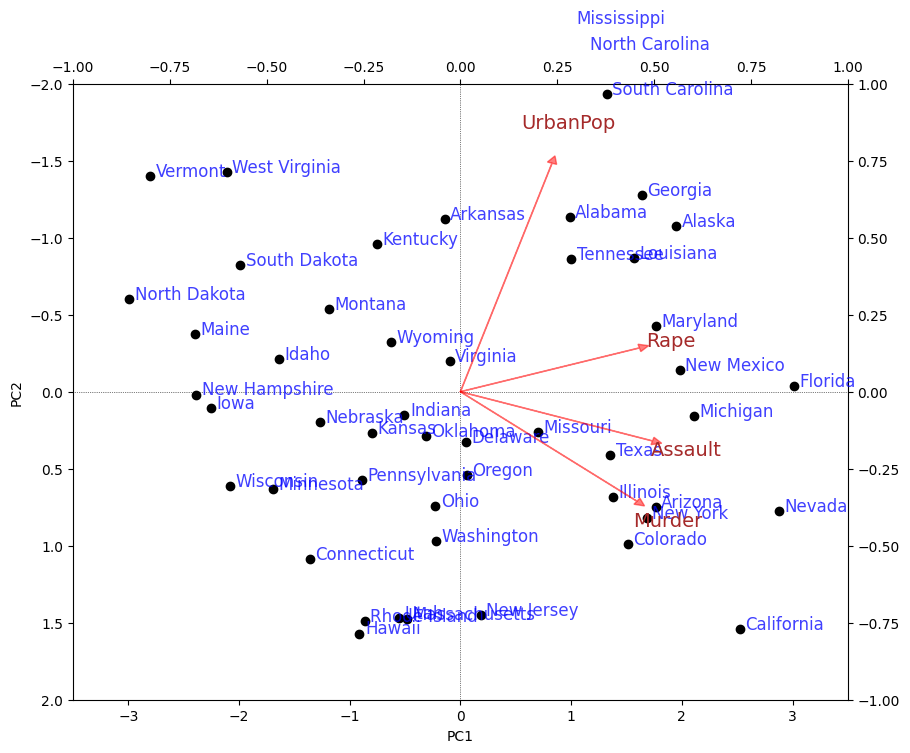

In [7]:
X_proj = pca.fit_transform(X)

biplot(X_proj,
       pca.components_.T,
       us_arrests.data.index,
       us_arrests.data.columns)

* Παρατηρούμε, για παράδειγμα, ότι το χαρακτηριστικό `UrbanPop` συνεισφέρει $0{,}27819087$ στην πρώτη συνιστώσα και $-0{,}87280619$ στη δεύτερη.

* Τα φορτία της κάθε συνιστώσας ονομάζονται *διάνυσμα φορτίων* (loading vector).

* Κάτω βλέπουμε το κάθε ένα από τα δύο διανύσματα σε διαφορετική στήλη.

* Τα διανύσματα φορτίων μας δείχνουν πώς κατασκευάζεται η κάθε συνιστώσα από τις αρχικές προϋπάρχουσες διαστάσεις και μπορούν να μας βοηθήσουν στη φυσική ερμηνεία των συνιστωσών.

In [8]:
pca.components_.T

array([[ 0.53589947, -0.41818087],
       [ 0.58318363, -0.1879856 ],
       [ 0.27819087,  0.87280619],
       [ 0.54343209,  0.16731864]])